<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-46/blob/main/Actividad_Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4
## Reduccion de datos
## Ciencia y analítica de datos
### Profesor: Jobish Vallikavungal Devassia
### Profesor Tutor: Roberto Antonio Guevara González
#### Bernardo Mijangos Flores
#### Matricula A01793654

# Paso 1

# Información de los datos

#### Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. 

#### Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

#### X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
#### X2: Género (1 = masculino; 2 = femenino).
#### X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
#### X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
#### X5: Edad (año).
#### X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
#### X12-X17: Importe del estado de cuenta (dólar NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
#### X18-X23: Monto del pago anterior (dólar NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

In [211]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
# obtenemos la ruta de la informacion 

inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [169]:
# generamos el dataframe

df = pd.read_csv(inPath, index_col = 0)
df.index.name = None
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [170]:
# revisamos la cantidad de registros y columnas

df.shape

(30000, 24)

In [187]:
# revisarmos los datos nulos 
df.isnull().values.any() 

True

In [188]:
 # identificamos las columnas con valores nulos

df.isnull().any() 

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# Limpieza de datos

se procede a quitar las variables categoricas dejando unicamente las numericas asi como la columa Y que es la variable de respuesta.

In [199]:
# obtenemos el total de registros y copiamos a un nuevo dataframe y obtenemos la lista de las columnas

ndf = df.copy()
ndf.shape

(30000, 24)

In [200]:
# eliminamos los valores nulos y revisamos el total de informacion

ndf.dropna(inplace = True)
ndf.shape

(29958, 24)

In [201]:
# se observa que no es representativo el total de valores nulos
print(1-(ndf.shape[0]/df.shape[0]) ) 

0.0013999999999999568


In [202]:
# se revisa de nuevo que ya no existan valores nulos
print(ndf.isna().values.any() )
print(ndf.isnull().values.any())

False
False


In [214]:
# quitamos las variables categoricas segun la descripcion de los datos

adf = ndf.copy()

lista = {'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'}
adf.drop(lista, 
         axis = 1, 
         inplace = True
        )

In [215]:
# revisamos de nuevo la informacion

adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X12     29958 non-null  float64
 2   X13     29958 non-null  float64
 3   X14     29958 non-null  float64
 4   X15     29958 non-null  float64
 5   X16     29958 non-null  float64
 6   X17     29958 non-null  float64
 7   X18     29958 non-null  float64
 8   X19     29958 non-null  float64
 9   X20     29958 non-null  float64
 10  X21     29958 non-null  float64
 11  X22     29958 non-null  float64
 12  X23     29958 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.2 MB


In [216]:
# se realiza la correlacion de las variables

adf.corr()

,X1,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
X12,0.285616,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
X13,0.278435,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
X14,0.283373,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
X15,0.294090,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
X16,0.295625,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
X17,0.290517,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
X18,0.195026,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
X19,0.178320,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563
X20,0.210052,0.156856,0.150631,0.129933,0.299953,0.252229,0.233710,0.252063,0.244709,1.000000,0.216281,0.159028,0.162667


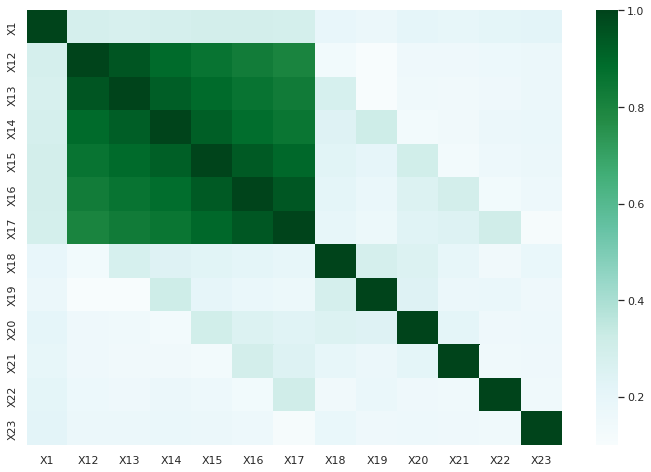

In [217]:
# para visualizar mejor la correlacion 

sns.set(rc={'figure.figsize':(12,8)}) 
misdatoscorr = adf.corr()
ax = sns.heatmap(misdatoscorr, cmap="BuGn")
plt.show()

In [218]:
## se observa que existe multiples variables con correlacion muy alta positivamente
## aplicamos PCA para normalizar la informacion

pcs = PCA() 
pcs.fit(preprocessing.scale(adf.dropna(axis=0)))

PCA()

In [219]:
pcsSumdf = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSumdf = pcsSumdf.transpose()
pcsSumdf.columns = ['PC{}'.format(i) for i in range(1, len(pcsSumdf.columns) + 1)]
pcsSumdf.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,2.4318,1.3085,0.9707,0.9402,0.9347,0.8845,0.8607,0.8523,0.5143,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4549,0.1317,0.0725,0.0680,0.0672,0.0602,0.0570,0.0559,0.0203,0.0055,0.0032,0.0019,0.0018
Cumulative proportion,0.4549,0.5866,0.6591,0.7271,0.7943,0.8544,0.9114,0.9673,0.9876,0.9931,0.9963,0.9982,1.0000


Se observa que son 7 los componentes que generan el .9114 del total de la varianza

# Paso dos

In [220]:
# Se obtienen los componentes seleccionados 

pcsComponentesdf = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSumdf.columns,
                                index=adf.columns
                                )

pcsComponentesdf.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,0.164821,0.293951,-0.392929,0.051168,-0.104442,0.255897,-0.800314
X12,0.372685,-0.190703,-0.074363,0.040767,-0.038684,0.003202,0.017836
X13,0.383520,-0.174107,0.003749,0.084287,-0.025024,-0.033223,-0.012841
X14,0.388541,-0.125829,0.072482,0.110977,0.102285,-0.115389,-0.025799
X15,0.391850,-0.119224,0.080828,0.030669,0.011442,0.122134,0.045429
X16,0.388805,-0.104580,0.050685,-0.102067,-0.103734,-0.014053,0.034811
X17,0.380968,-0.092774,-0.044910,-0.172261,0.069223,-0.005083,0.065330
X18,0.135142,0.386065,0.394230,0.235987,0.033602,-0.179313,-0.167904
X19,0.116787,0.411567,0.410514,0.142616,0.399039,-0.250852,-0.074504
X20,0.128043,0.394763,0.265181,-0.224107,-0.134503,0.752154,0.285234


Se resume los tres principales y la menor variable que representan a cada componente:

In [221]:
# resumen del componente PC1

print( " Min Variable  PC1 :" ) 
print( pcsComponentesdf.PC1.idxmin())

print( " Max Variables  PC1 :" ) 
print( pcsComponentesdf.PC1.nlargest(3))

 Min Variable  PC1 :
X23
 Max Variables  PC1 :
X15    0.391850
X16    0.388805
X14    0.388541
Name: PC1, dtype: float64


In [224]:
# resumen del componente PC2

print( " Min Variable  PC2 :" ) 
print( pcsComponentesdf.PC2.idxmin())

print( " Max Variables  PC2 :" ) 
print( pcsComponentesdf.PC2.nlargest(3))

 Min Variable  PC2 :
X12
 Max Variables  PC2 :
X19    0.411567
X20    0.394763
X18    0.386065
Name: PC2, dtype: float64


In [225]:
# resumen del componente PC3

print( " Min Variable  PC3 :" ) 
print( pcsComponentesdf.PC3.idxmin())

print( " Max Variables  PC :" ) 
print( pcsComponentesdf.PC1.nlargest(3))

 Min Variable  PC3 :
X22
 Max Variables  PC :
X15    0.391850
X16    0.388805
X14    0.388541
Name: PC1, dtype: float64


In [226]:
# resumen del componente PC4

print( " Min Variable  PC4 :" ) 
print( pcsComponentesdf.PC4.idxmin())

print( " Max Variables  PC4 :" ) 
print( pcsComponentesdf.PC4.nlargest(3))

 Min Variable  PC4 :
X21
 Max Variables  PC4 :
X23    0.652948
X18    0.235987
X19    0.142616
Name: PC4, dtype: float64


In [227]:
# resumen del componente PC5

print( " Min Variable  PC5 :" ) 
print( pcsComponentesdf.PC5.idxmin())

print( " Max Variables  PC5 :" ) 
print( pcsComponentesdf.PC5.nlargest(3))

 Min Variable  PC5 :
X21
 Max Variables  PC5 :
X22    0.638142
X19    0.399039
X14    0.102285
Name: PC5, dtype: float64


In [228]:
# resumen del componente PC6

print( " Min Variable  PC6 :" ) 
print( pcsComponentesdf.PC6.idxmin())

print( " Max Variables  PC6 :" ) 
print( pcsComponentesdf.PC6.nlargest(3))

 Min Variable  PC6 :
X21
 Max Variables  PC6 :
X20    0.752154
X1     0.255897
X15    0.122134
Name: PC6, dtype: float64


In [229]:
# resumen del componente PC7

print( " Min Variable  PC7 :" ) 
print( pcsComponentesdf.PC7.idxmin())

print( " Max Variables  PC7 :" ) 
print( pcsComponentesdf.PC7.nlargest(3))

 Min Variable  PC7 :
X1
 Max Variables  PC7 :
X23    0.409796
X20    0.285234
X22    0.253846
Name: PC7, dtype: float64


# Paso 3

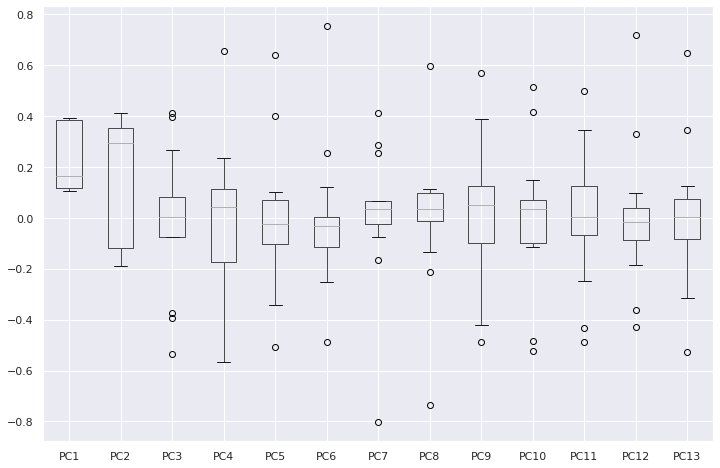

In [231]:
# se genera el grafico de cajas para observar los valores atipicos

pcsComponentesdf.boxplot() 

 # Responde las siguientes preguntas

# ¿Cuál es el número de componentes mínimo y por qué?

Considerando las variables que tome en cuenta para el trabajo y en base a tomar en cuenta el acumulado de la variaza en un 90% son siete componentes que representan el 91.14%

#¿Cuál es la variación de los datos que representan esos componentes?

Del primer componente que representa el 45.49% al segundo componente hay una diferencia del 13.17%, despues hay un 7.25% de diferncia hacia el tercer componente alcanzando en estos tres primeros el 65.91%, despues le sigue las diferencias del 6.8%, 6.72%, 6.01% y 5.7% hasta alcanzar el 91.14% en el septimo componente.

# ¿Cuál es la pérdida de información después de realizar PCA?

Se estaria perdiendo el 8.86% de los datos.

# De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Del componente 1 PC1 el valor maximo es X15 y el minimo es X23
Del componente 2 PC2 el valor maximo es X19 y el minimo es X12
Del componente 3 PC3 el valor maximo es X15 y el minimo es X22
Del componente 4 PC4 el valor maximo es X23 y el minimo es X21
Del componente 5 PC5 el valor maximo es X22 y el minimo es X21
Del componente 6 PC6 el valor maximo es X20 y el minimo es X21
Del componente 7 PC7 el valor maximo es X23 y el minimo es X1

# ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Considero que es muy importente realizar PCA cuando se tiene mucha informacion como fue este caso, se requiere de mucha practica para encontrar las variables que le den un buen resultado en el modelo que se decida utilizar y creo que es de los primeros pasos a realizar en el proceso de analisis de datos.
